In [34]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


# 生成数据集

In [35]:
# 用真实的方程随机生成数据
num_inputs = 2
num_examples = 100
true_w = [2, -3.4]
true_b = 4.2

features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
features = features.to(torch.float32)

labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))
print(features[0], labels[0])

tensor([-0.1637, -1.5877]) tensor(9.2738)


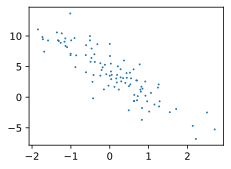

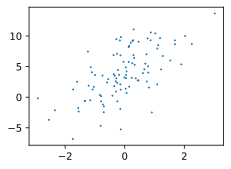

In [36]:
# 生成第二个特征和标签的散点图
import matplotlib_inline.backend_inline as inline_backend
# sys.path.append('../')
from d2lzh_pytorch import *
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.show()
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)
plt.show()

# 读取数据

In [37]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))  # 一维的列表，用于存储索引
    random.shuffle(indices)  # 打乱索引，样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i:min(i + batch_size, num_examples)])  # 最后一次可能不足一个batch, 把一个list转成了tensor而
        yield features.index_select(0, j), labels.index_select(0, j)  # 已，实际上还是一个一纬的tensor，索引意义s
        

# 我理解了，这个yield意思就是一轮一轮的返回，专门为了循环定制

# 初始化模型参数

In [38]:
# 初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

# 设置梯度
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

# 定义模型、损失函数、优化器

In [39]:
# 定义模型 mm -> matrix multiplication  X(number, feature), w (feature , 1) b(1)
def linreg(X, w, b):
    return torch.mm(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [40]:
def sgd(params, lr, batch_size):
    # sgd (stochastic gradient descent)
    for param in params:
        param.data -= lr * param.grad / batch_size

In [41]:
print(features.dtype)
print(w.dtype)

torch.float32
torch.float32


# 训练模型

In [42]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

# 就是一轮训练 我是一个一个小批次训练的
# 下一轮大训练，从小训练的批次开始，继续训练，减少loss
for epoch in range(num_epochs):
    # 在每一个迭代周期中，我都会把所有的样本训练一次
    for X,y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # .sum()是为了把l从 (10, 1)的变量变成标量
        l.backward()
        sgd([w, b], lr, batch_size) # 在这一步进行梯度的更新
        
        w.grad.data.zero_()
        b.grad.data.zero_() 
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 8.810605
epoch 2, loss 4.886043
epoch 3, loss 2.732090
